In [1]:
!pip install git+https://github.com/sympy/sympy
!pip install pyJHTDB

  Cloning https://github.com/sympy/sympy to /tmp/pip-req-build-6y03ewmm
  Running command git clone -q https://github.com/sympy/sympy /tmp/pip-req-build-6y03ewmm
  Created wheel for sympy: filename=sympy-1.5.dev0-cp36-none-any.whl size=5534119 sha256=dd509123a8aeaecf13e4f451e7d7173dbffb119efd2e3b899d56353a8e2f0647
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_g8bwou/wheels/d3/f9/eb/6a3e9b307c32f479fe8d79acde97ffb0e0347523eb08d7974b
Successfully built sympy


Coordinates of 10 points where variables are requested:
0: [0.26722556 1.2045938  3.5212648 ]
1: [2.803416  3.3613062 6.175737 ]
2: [3.0095475  0.30404788 3.7512388 ]
3: [1.468639  4.8806157 4.2501316]
4: [1.826852  2.066706  6.1950426]
5: [4.1919484 5.924139  3.5380826]
6: [2.297121 1.27136  1.941831]
7: [5.275693   4.222599   0.29681003]
8: [5.834239  4.5348716 2.6812077]
9: [2.0923216  0.10288028 3.1214666 ]
Data is requested at time 0.9580000000000001
Requesting velocity at 10 points...
0: [ 0.01840156 -0.6045866   0.09296913]
1: [ 1.2605051  -0.38512656 -1.1762236 ]
2: [-1.260283   -0.37274405  0.3814051 ]
3: [ 0.96566594 -1.4453986  -0.46064192]
4: [ 0.33177096 -0.893218   -0.9035852 ]
5: [-0.42675114  0.5221546   0.34963837]
6: [-0.6915866   0.79701096 -0.24597657]
7: [0.7223354  0.03044994 0.6764267 ]
8: [-0.536043   -0.9027639  -0.11710008]
9: [-0.37825933 -0.18756258 -0.17852177]
Requesting forcing at 10 points...
0: [ 0.00820604 -0.08771505 -0.02052697]
1: [ 0.04804466  0.05

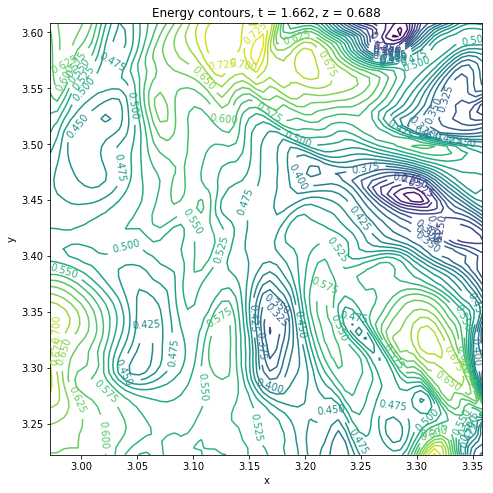

In [2]:
from pyJHTDB import test_plain
test_plain()

Example usage for pyJHTDB.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyJHTDB

In [ ]:
from pyJHTDB.dbinfo import isotropic1024coarse

In [ ]:
info = isotropic1024coarse

In [6]:
info

{'diss': 0.0928,
 'dx': 0.006135923151542565,
 'dy': 0.006135923151542565,
 'dz': 0.006135923151542565,
 'lx': 6.283185307179586,
 'ly': 6.283185307179586,
 'lz': 6.283185307179586,
 'name': 'isotropic1024coarse',
 'nu': 0.000185,
 'nx': 1024,
 'ny': 1024,
 'nz': 1024,
 'time': array([0.0000000e+00, 1.9999999e-03, 3.9999997e-03, ..., 1.0049999e+01,
        1.0051999e+01, 1.0054000e+01], dtype=float32),
 'xnodes': array([0.0000000e+00, 6.1359233e-03, 1.2271847e-02, ..., 6.2647777e+00,
        6.2709136e+00, 6.2770495e+00], dtype=float32),
 'xperiodic': True,
 'xuniform': True,
 'ynodes': array([0.0000000e+00, 6.1359233e-03, 1.2271847e-02, ..., 6.2647777e+00,
        6.2709136e+00, 6.2770495e+00], dtype=float32),
 'yperiodic': True,
 'yuniform': True,
 'znodes': array([0.0000000e+00, 6.1359233e-03, 1.2271847e-02, ..., 6.2647777e+00,
        6.2709136e+00, 6.2770495e+00], dtype=float32),
 'zperiodic': True,
 'zuniform': True}

In [7]:
60*0.045 # #60 \times \tau_k$

2.6999999999999997

20 cubes around the 3D space of teh simulation in each cube 400 particles randomly distributed within 128 $\eta$

In [ ]:
# 20 seed nodes in 3D, x,y,z
ind = np.random.randint(45,1024-45,size=(20,3))

eta = 0.002 # Kolmogorov
positions = []

for i in range(20):
    tmp = 128*eta*(np.random.random((400,3))-0.5) # 20 particles around the selected node within 128 \eta
    positions.append((info['xnodes'][ind[i,0]],info['ynodes'][ind[i,1]],info['znodes'][ind[i,2]]) + tmp)
    
positions = np.vstack(positions).astype(np.float32)
# positions.shape

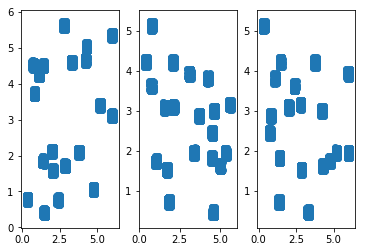

In [9]:
fig,ax = plt.subplots(ncols=3)
ax[0].scatter(positions[:,0],positions[:,1])
ax[1].scatter(positions[:,1],positions[:,2])
ax[2].scatter(positions[:,0],positions[:,2])

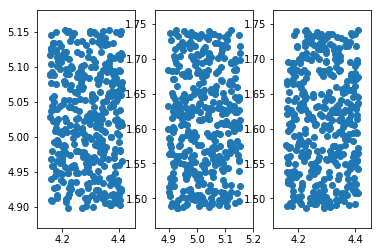

In [10]:
fig,ax = plt.subplots(ncols=3)
ax[0].scatter(positions[:400,0],positions[:400,1])
ax[1].scatter(positions[:400,1],positions[:400,2])
ax[2].scatter(positions[:400,0],positions[:400,2])

lJHTDB = pyJHTDB.libJHTDB()

lJHTDB.initialize()

x, t = lJHTDB.getPosition(
    starttime = info['time'][0],
    endtime = info['time'][-1],
    dt = 0.0004,
    point_coords = positions,
    steps_to_keep = 120)

lJHTDB.finalize()

np.savez('trajectories',x,t)

In [ ]:
lJHTDB = pyJHTDB.libJHTDB()

lJHTDB.initialize()


u = lJHTDB.getData(
               0.0,
               positions,
               sinterp = 4,
               getFunction='getVelocity')


x, t = lJHTDB.getPosition(
    starttime = 0.0,
    endtime = 4.0,
    dt = 0.0004,
    point_coords = positions,
    steps_to_keep = 120)

lJHTDB.finalize()

np.savez('trajectories',u=u,x=x,t=t)

Now, plot trajectories. Not spectactular because they're not that long, but this is the way a simple plot would work for long trajectories as well.

fig = plt.figure(figsize = (10, 5))
a = fig.add_subplot(111)
a.plot(x[:, 0], x[:, 1])